# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

# 读取数据

In [7]:
import pandas as pd
original_penguins = pd.read_csv("./penguins.csv")

# 评估数据
主要围绕分析目标进行评估：
    从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

#### 评估数据整洁度

In [21]:
original_penguins.sample(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
243,Gentoo,Biscoe,46.3,15.8,215.0,5050.0,MALE
40,Adelie,Dream,36.5,18.0,182.0,3150.0,FEMALE
308,Gentoo,Biscoe,47.5,14.0,212.0,4875.0,FEMALE
114,Adelie,Biscoe,39.6,20.7,191.0,3900.0,FEMALE
174,Chinstrap,Dream,43.2,16.6,187.0,2900.0,FEMALE


In [13]:
original_penguins.tail(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


通过提取部分企鹅数据是满足：1.每列是一个变量，2.每行是一个观察值，3.每个单元格是一个值，的整洁数据

#### 评估数据干净程度

In [24]:
original_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


`Penguins.csv` 一共有344条观察值,其中:culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g 有两条为空的值。
`species：企鹅的种类`和`island：企鹅所在岛`和`sex：企鹅性别`都是分类数据，因此可以把数据类型都转换为`Category`。

#### 评估缺失数据

In [28]:
# 尝试查看 culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g 为空的值
original_penguins[original_penguins["culmen_depth_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [30]:
# 尝试查看 sex 为空的数据
original_penguins[original_penguins["sex"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


都为空的值有两条,需要进行清洗。根据分析目标来看，性别为空的值也需要进行清洗。

# 评估重复数据
这里我们可以尝试判断 `species：企鹅的种类`是否有重复值。其他的观察值都可以允许重复。

In [35]:
original_penguins[original_penguins.duplicated(subset=["species"])]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


相同种类允许有多个不同身高体重性别的企鹅，这是没问题的。

#### 评估不一致数据
可以尝试查看`species：企鹅的种类`和`island：企鹅所在岛`和`body_mass_g：企鹅体重（单位为克）`的表现形式是否一致。

In [37]:
# 查看 species：企鹅的种类 是否不一致
original_penguins["species"].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [39]:
# 查看 island：企鹅所在岛 是否不一致
original_penguins["island"].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [41]:
# 查看 body_mass_g：企鹅体重（单位为克） 是否不一致
original_penguins["body_mass_g"].value_counts()

body_mass_g
3800.0    12
3700.0    11
3900.0    10
3950.0    10
3550.0     9
          ..
4475.0     1
3975.0     1
3575.0     1
3850.0     1
5750.0     1
Name: count, Length: 94, dtype: int64

In [78]:
# 查看 sex：企鹅性别 是否不一致
original_penguins["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

除了`sex：企鹅性别 ` 其他没有表现形式(多种不同表现形式指代同一位置的情况)。
这里我们不知道其性别，直接该数据清洗数据

#### 评估无效或错误的数据

In [92]:
# 先查看数据对象的统计信息  .describe()函数
original_penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# 清理数据
1. 删除 `culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g 为空的值`的两条数据。
2. 删除`sex：企鹅性别`为空和为`.`的数据。
3. `species：企鹅的种类`和`island：企鹅所在岛`和`sex：企鹅性别`都是分类数据，因此可以把数据类型都转换为`Category`。

In [126]:
# 清洗数据前,先对员数据进行备份
cleaned_penguins = original_penguins.copy()

In [128]:
# 1. 删除 culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g 为空的值的两条数据。
_ = cleaned_penguins[cleaned_penguins["culmen_depth_mm"].isnull()].index
cleaned_penguins.drop(_,inplace=True)

In [130]:
# 2. 删除性别为空的数据。
_ = cleaned_penguins[cleaned_penguins["sex"].isnull()].index
cleaned_penguins.drop(_,inplace=True)

In [132]:
# 删除为`.`的性别数据
_ = cleaned_penguins[cleaned_penguins["sex"] == "."].index
cleaned_penguins.drop(_,inplace=True)

In [134]:
# 3. `species：企鹅的种类`和`island：企鹅所在岛`和`sex：企鹅性别`都是分类数据，因此可以把数据类型都转换为`category`。
cleaned_penguins["species"] = cleaned_penguins["species"].astype("category")
cleaned_penguins["island"] = cleaned_penguins["island"].astype("category")
cleaned_penguins["sex"] = cleaned_penguins["sex"].astype("category")

In [136]:
cleaned_penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   culmen_length_mm   333 non-null    float64 
 3   culmen_depth_mm    333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.4 KB


# 可视化数据

##### 查看企鹅种类比例
有一个 Series对象方法叫: value_count()方法.用于直接获取分组聚合个数

In [145]:
# 把数据通过 species：企鹅的种类 进行分组再去数个数
# 对种类进行分组，取出不同种类个数(取个数就随便取一个无缺失值的数据即可,这里使用["island"])
cleaned_penguins.groupby("species")["island"].count()

C:\Users\27252\AppData\Local\Temp\ipykernel_33284\1151987883.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cleaned_penguins.groupby("species")["island"].count()


species
Adelie       146
Chinstrap     68
Gentoo       119
Name: island, dtype: int64

In [147]:
# 有一个 Series对象方法叫: value_count()方法.用于直接获取分组聚合个数
species_count = cleaned_penguins["species"].value_counts()
species_count

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

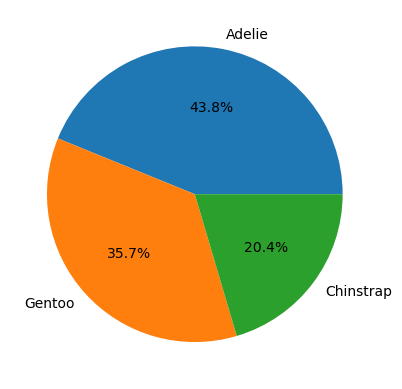

In [157]:
# 绘制饼图
import matplotlib.pyplot as plt
import seaborn as sns
"""
labels=species_count.index 这里表示指定索引赋值给标签
"""
plt.pie(species_count,labels=species_count.index,autopct='%.1f%%')
plt.show()

##### 企鹅所属岛屿比例

In [159]:
island_count = cleaned_penguins["island"].value_counts()
island_count

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

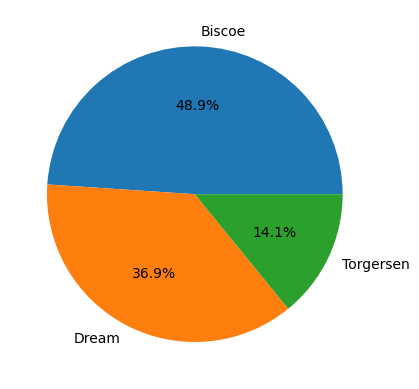

In [167]:
plt.pie(island_count,labels=island_count.index,autopct='%.1f%%')
plt.show()

##### 企鹅性别比例

In [170]:
sex_count = cleaned_penguins["sex"].value_counts()
sex_count

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

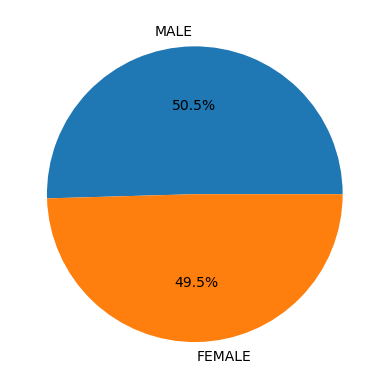

In [172]:
plt.pie(sex_count,labels=sex_count.index,autopct='%.1f%%')
plt.show()

##### 不同岛上有哪些种类企鹅
.countplot()计数图

In [212]:
# 对不同岛屿上的企鹅种类进行分组，最外层一定是岛屿，然后是企鹅种类
island_and_species_count = cleaned_penguins.groupby(["island","species"])["sex"].count()
island_and_species_count

C:\Users\27252\AppData\Local\Temp\ipykernel_33284\3291202160.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  island_and_species_count = cleaned_penguins.groupby(["island","species"])["sex"].count()


island     species  
Biscoe     Adelie        44
           Chinstrap      0
           Gentoo       119
Dream      Adelie        55
           Chinstrap     68
           Gentoo         0
Torgersen  Adelie        47
           Chinstrap      0
           Gentoo         0
Name: sex, dtype: int64

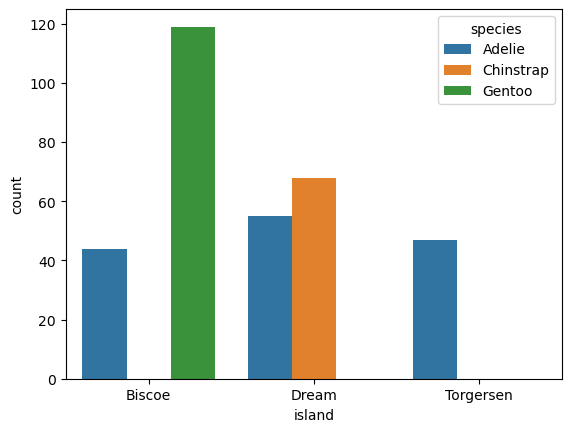

In [190]:
# 直接使用 seaborn库 下的计数图 .countplot()
"""
.countplot()计数图能直接统计个数并绘制图表
    cleaned_penguins 数据源
    x="island"     这里我们把x轴设置为 island:企鹅所在岛 (y轴就会被自动填充为企鹅种类)
    hue="species"  颜色区分不同企鹅种类(species)
"""
sns.countplot(cleaned_penguins,x="island",hue="species")
plt.show()

##### 不同岛屿上企鹅性别数量
.countplot()计数图

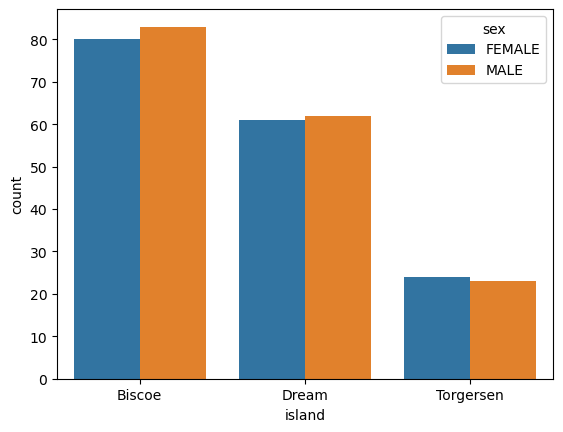

In [221]:
sns.countplot(cleaned_penguins,x="island",hue="sex")
plt.show()

##### 查看数值之间的相关关系
sns.pairplot()：绘制数据集中每两个变量两两组合的散点图和对应的分布图，方便观察变量间的关系和分布情况。

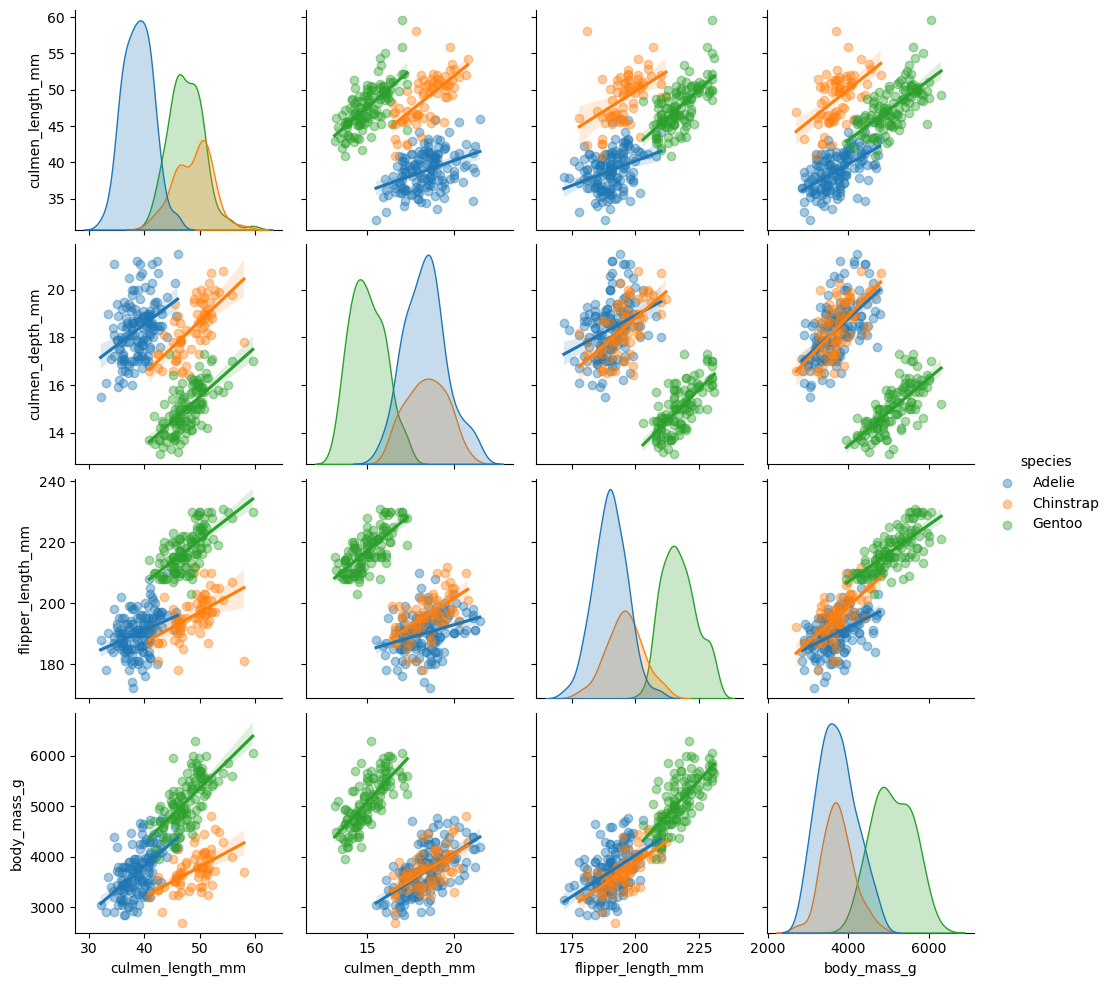

In [243]:
"""
hue 用来指定数据中某个分类变量（类别列），然后根据这个分类变量把数据点分成不同的颜色。
kind="reg" 表示回归线，散点图上会叠加一条回归线。
plot_kws={"scatter_kws":{"alpha":0.4}} 传递给绘图函数的额外参数
    scatter_kws 表示是专门传给散点图的参数
    alpha 表示透明度(0~1之间)
"""
sns.pairplot(cleaned_penguins,hue="species",kind="reg", plot_kws={"scatter_kws":{"alpha":0.4}})
plt.show()

散点图结合线性回归线来看，同类企鹅的属性数据之间均呈现线性正比，即嘴峰越长，嘴峰就越深，体重越重。